# **Introduzione al Machine Learning -- laboratorio 3 e 4**


*   Leggi di probabilità importanti

Serve il modulo `scipy.stats`

In [1]:
from scipy.stats import *
import matplotlib.pyplot as plt
import numpy as np

Tracciamo la pdf di una legge Gaussiana di media 20 e deviazione standard 3

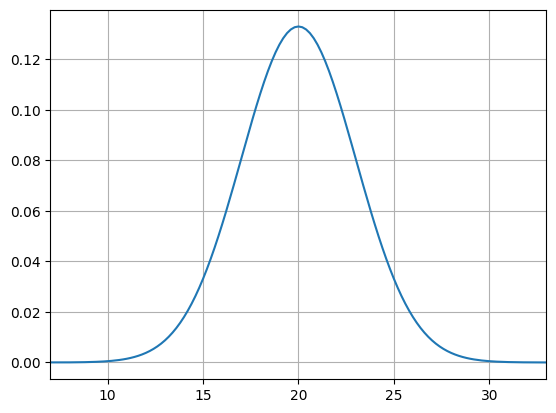

In [9]:
mu    = 20
sigma = 3

z = norm(loc=mu, scale=sigma)

x = np.linspace(0, 40, 201)
y = z.pdf(x)

plt.plot(x, y)
plt.xlim((7, 33))
plt.grid()
plt.show()

Testiamo il TLC: generate 100 vv.aa. uniformi tra 0 e 1 e verificate che la loro somma abbia approssimativamente legge normale.

In [18]:
unif = np.random.rand(1000, 100)
s = unif.sum(axis=1)

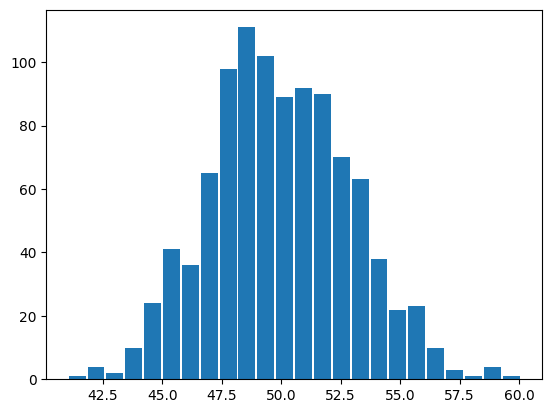

In [22]:
plt.hist(s, bins='auto', rwidth=0.9)
plt.show()

Grafici sovrapposti di un po' di lognormali

0.5
0.5
0.5
0.5
0.022750131948179195


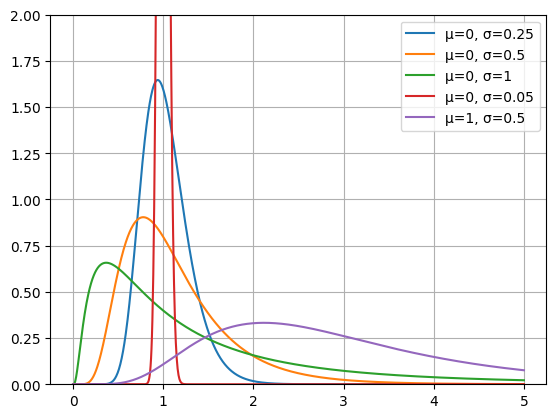

In [32]:
x = np.linspace(0, 5, 1001)

params = [(0, 0.25), (0, 0.5), (0, 1), (0, 0.05), (1, 0.5)]

# mu    = 0
# sigma = 0.25
# scale = np.exp(mu)
# s     = sigma

# plt.plot(x, lognorm.pdf(x, s, loc=0, scale=scale), label='μ=0, σ=0.25')
for (mu, sigma) in params:
  plt.plot(x, lognorm.pdf(x, s=sigma, loc=0, scale=np.exp(mu)), label=f'μ={mu}, σ={sigma}')
  print(lognorm.cdf(1, s=sigma, loc=0, scale=np.exp(mu)))
plt.legend()
plt.ylim(0, 2)
plt.grid()
plt.show()

Una lognorm(mu=0, sigma=0.05) è un numero casuale che è circa 1±0.05, e si adatta bene ad essere usato come _fattore moltiplicativo_ per ottenere perturbazioni casuali piccole.

Cambiare μ cambia solo la scala.

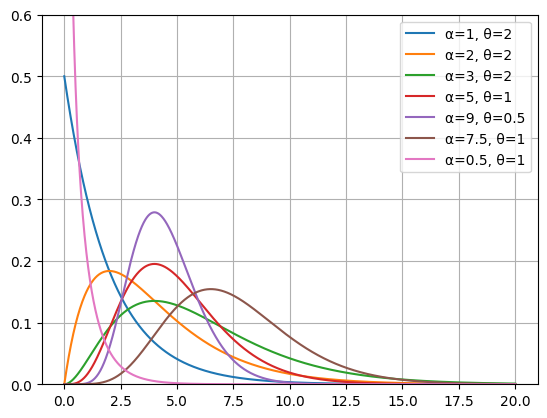

In [37]:
x = np.linspace(0, 20, 1001)

params = [(1, 2), (2, 2), (3, 2), (5, 1), (9, 0.5), (7.5, 1), (0.5, 1)]

for (alpha, theta) in params:
  plt.plot(x, gamma.pdf(x, a=alpha, loc=0, scale=theta), label=f'α={alpha}, θ={theta}')
plt.legend()
plt.ylim(0, 0.6)
plt.grid()
plt.show()

Proviamo a verificare quanto il livello di "Gaussianità" della gamma cambia al variare del parametro di shape, alpha.

Facciamo una sorta di diagramma Q-Q teorico a partire non da un campione di vv.aa., ma dalla CdF esatta.

In [41]:
n = 502
p = np.linspace(0, 1, n)[1:-1]
print(len(p))

500


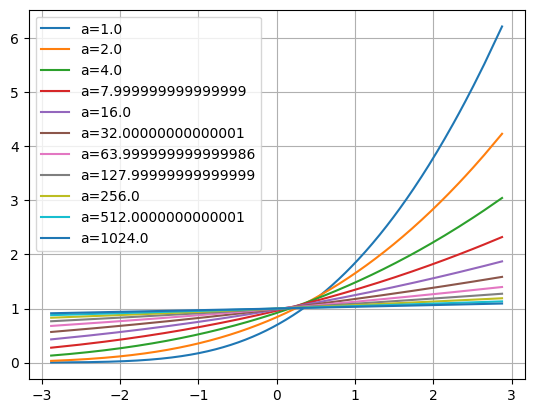

In [48]:
x_gauss = norm.ppf(p)
y_gamma = gamma.ppf(p, a=1000)
for a in np.geomspace(1, 1024, 11):
  plt.plot(x_gauss, gamma.ppf(p, a, scale=1/a), label=f'a={a}')
plt.grid()
plt.legend()
plt.show()

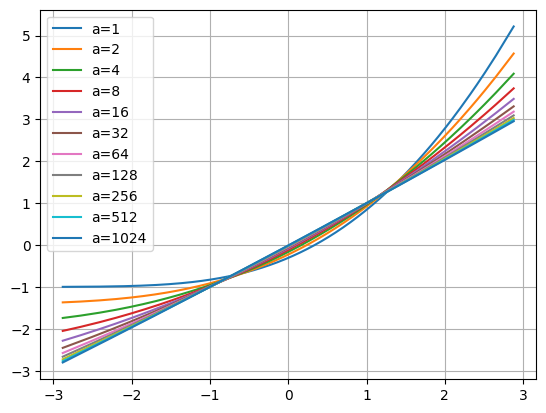

In [52]:
x_gauss = norm.ppf(p)
y_gamma = gamma.ppf(p, a=1000)
for a in np.geomspace(1, 1024, 11):
  plt.plot(x_gauss, (gamma.ppf(p, a, scale=1)-a)/np.sqrt(a), label=f'a={int(np.round(a))}')
plt.grid()
plt.legend()
plt.show()

Si vede che intorno a α=100-200 la distribuzione è praticamente Gaussiana.

Verifichiamo che il numero di eventi in un tempo finito per un processo di Poisson, ha legge di Poisson.

Genero 1000 volte un processo di Poisson di parametro λ=1, fino ad un tempo max di 50.

1. Verifico che al tempo 15 il numero di eventi abbia circa legge di Poisson di media 15.
2. Traccio il grafico di N_t in funzione di t, per alcune delle simulazioni.

In [53]:
it = 1000
t_max = 50

ps = []
for i in range(it):
  s = 0
  ts = []
  while s<t_max:
    t = expon.rvs()
    ts.append(t)
    s += t
  ps.append(ts)

In [63]:
ts = ps[0]
ts
ss = np.cumsum(ts)
sum(ss<15)

18

In [64]:
n_15 = []
for ts in ps:
  n_15.append(sum(np.cumsum(ts)<15))

In [67]:
np.mean(n_15)

15.084

In [69]:
n_15[0:10]

[18, 13, 17, 14, 11, 12, 11, 17, 17, 12]

In [80]:
sum(np.array(n_15)==29)

4

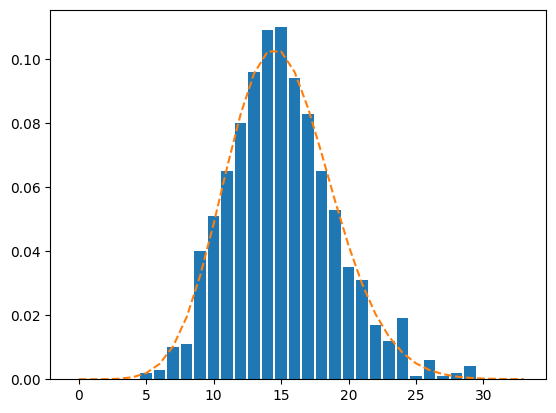

In [85]:
vals = range(max(n_15)+5)
plt.hist(n_15, align='left', rwidth=0.85, bins=list(vals), density=True)
plt.plot(vals, poisson.pmf(vals, 15), '--')
plt.show()